# 의사결정트리(DecisionTreeClassifier)로 알아보는 붓꽃 결정 특성
* 붓꽃을 결정하는 특성이 어떤 것이 좌우되는지 알아보고자 하며 다음과 같은 방법으로 알아보려고 한다.
 * 첫째는 기본적으로 단위 Leaf가 나올때까지 의사결정하는 방법
 * Node를 제한하는 방법

In [1]:
import warnings
warnings.filterwarnings('ignore')


from matplotlib import font_manager, rc
font_name  = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import graphviz
from IPython import display
from sklearn.tree import export_graphviz

iris_data = load_iris()

In [3]:
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state = 10)

## 1. 모든 리프노드가 순수노드

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.967


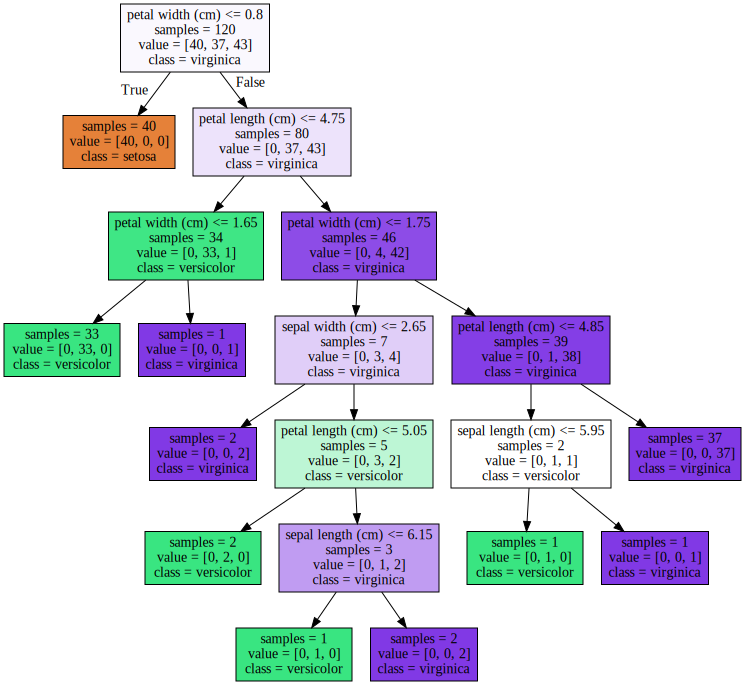

In [7]:
dtree = DecisionTreeClassifier(max_depth = None)
dtree.fit(X_train, y_train)


print("훈련 세트 정확도: {:.3f}".format(dtree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(dtree.score(X_test, y_test)))


export_graphviz(dtree, out_file = "genuine_tree.dot", class_names = ['setosa', 'versicolor', 'virginica'],
               feature_names = iris_data.feature_names, impurity = False, filled = True)

with open(("genuine_tree.dot"), "r", encoding = 'utf8') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### 1.1 feature imortrance 시각화

In [8]:
print("순수노드의 특성 중요도 : \n" , dtree.feature_importances_)

순수노드의 특성 중요도 : 
 [0.02922146 0.0128813  0.40757496 0.55032229]


In [9]:
print("붓꽃의 특성 : \n" , iris_data.feature_names)

붓꽃의 특성 : 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


0.029 : sepal length (cm)
0.013 : sepal width (cm)
0.408 : petal length (cm)
0.550 : petal width (cm)


Text(0.5, 1.0, '붓꽃종류 결정 특성인자')

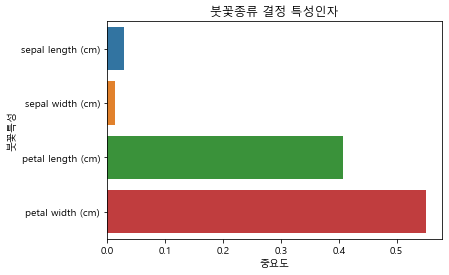

In [20]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

iris_feature_importance = zip(dtree.feature_importances_, iris_data.feature_names)

# Feature별 중요도 매핑
for value, name in iris_feature_importance:
    print("{0:.3f} : {1}".format(value, name))
    
sns.barplot(x = dtree.feature_importances_, y = iris_data.feature_names)
plt.xlabel('중요도')
plt.ylabel('붓꽃특성')
plt.title("붓꽃종류 결정 특성인자")

## 2. max_depth = `3`

훈련 세트 정확도: 0.967
테스트 세트 정확도: 0.933


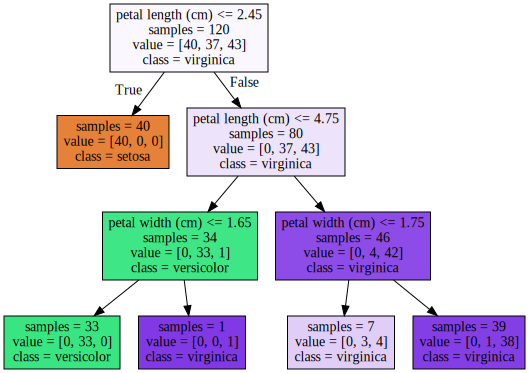

In [22]:
dtree3 = DecisionTreeClassifier(max_depth = 3)
dtree3.fit(X_train, y_train)


print("훈련 세트 정확도: {:.3f}".format(dtree3.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(dtree3.score(X_test, y_test)))


export_graphviz(dtree3, out_file = "genuine_tree3.dot", class_names = ['setosa', 'versicolor', 'virginica'],
               feature_names = iris_data.feature_names, impurity = False, filled = True)

with open(("genuine_tree3.dot"), "r", encoding = 'utf8') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### 2.1 특성의 중요도 시각화

0.000 : sepal length (cm)
0.000 : sepal width (cm)
0.948 : petal length (cm)
0.052 : petal width (cm)


Text(0.5, 1.0, '붓꽃종류 결정 특성인자')

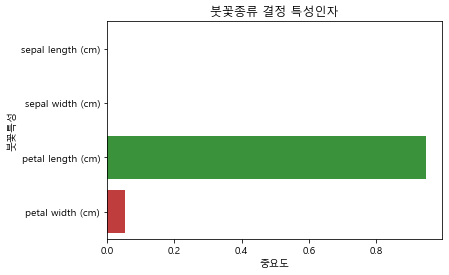

In [23]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

iris_feature_importance = zip(dtree3.feature_importances_, iris_data.feature_names)

# Feature별 중요도 매핑
for value, name in iris_feature_importance:
    print("{0:.3f} : {1}".format(value, name))
    
sns.barplot(x = dtree3.feature_importances_, y = iris_data.feature_names)
plt.xlabel('중요도')
plt.ylabel('붓꽃특성')
plt.title("붓꽃종류 결정 특성인자")

**정리**
* 순수노드일 때는 붓꽃의 종류를 결정하는 특성이 꽃받침너비(sepal width), 꽃잎높이(peatl height),꽃잎너비(petal width)가 세가지가 중요요소가 표현이 된다.
* depth가 3개까지 제한이 되는 경우는,꽂잎높이(petal height)와 꽃잎너비(petal width)가 주요결정 특성으로 선택되었다.
* 두 결정트리의 테스트 정확도는 차이가 없는것으로 보여진다.